# Initial Dataset Exploration with pandas DataFrames

Now we’re going to dive into our first data set. I’m extremely excited because this is where things actually get fun! We’re going to encounter some real problems that you’ll likely experience all the time during your analysis and work.

So lets get started!

Let’s go ahead and open up the `running_data.csv`

In [1]:
%matplotlib inline
import sys
print(sys.version)
import numpy as np
print(np.__version__)
import pandas as pd
print(pd.__version__)
import matplotlib.pyplot as plt

3.5.0 (v3.5.0:374f501f4567, Sep 12 2015, 11:00:19) 
[GCC 4.2.1 (Apple Inc. build 5666) (dot 3)]
1.9.2
0.16.2


Now pandas provides a lot of easy functions for reading in different data types and it'll read in the data as a DataFrame. We're going to be using the `read_csv` command because we're working with a comma separated file. However you should know that there are a lot of other formats that we can use. We aren't going to cover them in detail but they are there and including:

- read_csv
- read_excel
- read_hdf
- read_sql
- read_json
- read_msgpack (experimental)
- read_html
- read_gbq (experimental)
- read_stata
- read_clipboard
- read_pickle

In [2]:
df = pd.read_csv('../data/raw_running_data.csv')
print(type(df))
df.head(10)

<class 'pandas.core.frame.DataFrame'>


,Date,Miles,Time
0,8/2/14,1.70,NaN
1,8/3/14,1.40,NaN
2,8/4/14,2.10,NaN
3,8/6/14,2.38,NaN
4,8/7/14,2.30,NaN
5,8/8/14,3.40,NaN
6,8/9/14,2.50,NaN
7,8/10/14,3.36,0:28:37
8,8/11/14,1.67,0:13:07
9,8/12/14,1.42,0:10:35


So now we've read in the data and gotten a DataFrame back. Perfect! Before we continue, take a look at the read_csv parameters - you'll see that there are a ton of options that we can set. We can skip rows, specify dtypes, compression, indexes. This function could be a whole video itself.

In [3]:
?pd.read_csv()

The important take away is, when you're reading files, you've got a lot of options. You can do a lot of this processing after the fact or when you read in the file.
So let's explore the data types we've got in this data set.

In [4]:
df.dtypes

Date      object
Miles    float64
Time      object
dtype: object

Well we've got this Time column that shouldn't be an object, same with the date - we can address both of those shortly. Before we do that we should know a bit more about this data. One of your instructors, Bill Chambers, recorded all of his runs from August 1st 2014 to January 1st 2015. During these several months I recorded distance, time of the run as well as the date.

In [5]:
df.columns

Index(['Date', 'Miles', 'Time'], dtype='object')


Now we can see our 3 columns here, date, miles and time. We can see that we’ve got some NaN values when I didn’t record the time. We saw those in the head command above.

We’ve also go our index which is just numbered - we'll be changing that later as well.

In [6]:
df.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80],
           dtype='int64')

# Time Series Data

Now pandas is absolutely fantastic with time series data. It’s got a ton of cool functionality. You should prepare to have your mind blown! However before we can leverage it correctly, we've got to convert our types  to date/datetime types so that we can query with dates.

So let's get started there. Now we're going to manipulate the date column.

In [7]:
df['Date'].head()

0    8/2/14
1    8/3/14
2    8/4/14
3    8/6/14
4    8/7/14
Name: Date, dtype: object

Now when we go to get our date Series, we can see that the dtype is object. That’s not write, we want something that’s date based. Specifically datetime64.

Naturally there are several ways that we can do this buy arguably the easiest is just to read in the dates correctly when we read in the `csv` itself.

In [8]:
df = pd.read_csv('../data/raw_running_data.csv', parse_dates=['Date'])

In [9]:
df.Date.head()

0   2014-08-02
1   2014-08-03
2   2014-08-04
3   2014-08-06
4   2014-08-07
Name: Date, dtype: datetime64[ns]

Bingo, now we’ve got the correct dates. 

Now pandas is pretty good at parsing dates but occasionally it will mess them up. You may have to write a custom date parser but doing so is outside the scope of this course. The documentation is available online to do something like this.

Let’s continue with our analysis.

Now that we’ve gotten our dates parsed, let’s try set the Dates as the index.

In [10]:
df.set_index('Date', inplace=True)

You’ll see I’m using the `inplace=True` option. This is because typically pandas will try to return a new data frame rather than editing our current one. In place makes so that it edits the current one. Now I prefer to create new dataframes (remember our discussions about immutability!?!) but it's good to know this is available as well!

So now that we've set this, let's take a look at our DataFrame.

In [11]:
df.head()

,Miles,Time
Date,,
2014-08-02,1.70,NaN
2014-08-03,1.40,NaN
2014-08-04,2.10,NaN
2014-08-06,2.38,NaN
2014-08-07,2.30,NaN


Perfect! We've got this date series as our index, we've got times and we've got Miles! Let's go ahead and plot the data and see what it looks like!

##Plotting

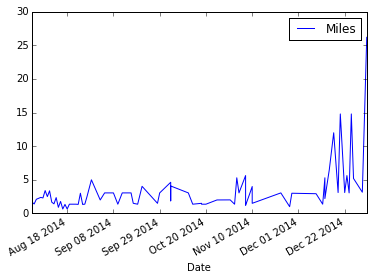

In [12]:
df.plot()

You’ll see that it prints what it can, it doesn’t understand what our `time` column is yet so it doesn’t plot it. We’ll address that a bit later. However it undertands that because our `Index` is a `datetime64` object that we want to print it as a time series. How cool is that? It did that all automatically for us!

In [13]:
?df.plot


Now you can see there are different ways of plotting this date. The default is line but we also have bar charts, or area charts, or density charts (with appropriate kinds of data).

Let's try out some of the other chart types.

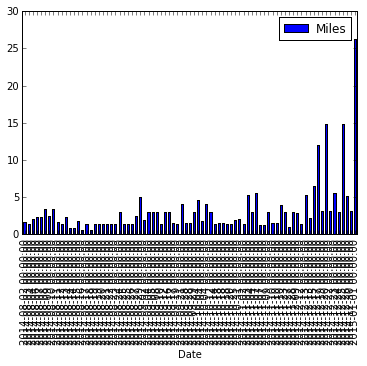

In [14]:
df.plot(kind='bar')

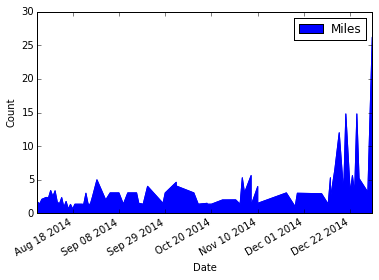

In [15]:
df.plot(kind='area')
plt.ylabel("Count")

That `plt` module is `pyplot` and is a part of `matplotlib` which we imported at the top of our notebook. You also have have noticed that we've started including the magic command `%matplotlib inline` at the top of our files. That allows us to embed matplotlib graphs in our notebooks.

Let's continue on with our analysis. You'll notice that at this point we have a fair amount of data however pandas/ipython won't print it all even if we try to. This is because doing so would be troublesome for the displays - and imagine if this file was a million lines long. Our system would likely crash.

pandas substitutes those rows that it skips with `...`

In [16]:
df

,Miles,Time
Date,,
2014-08-02,1.70,NaN
2014-08-03,1.40,NaN
2014-08-04,2.10,NaN
2014-08-06,2.38,NaN
2014-08-07,2.30,NaN
2014-08-08,3.40,NaN
2014-08-09,2.50,NaN
2014-08-10,3.36,0:28:37
2014-08-11,1.67,0:13:07


Now that we’ve printed our the data in our data frame both as a graph and as a table, let’s try summarizing it a bit better. 

Remember the `describe` command with the pandas Series - well we can do the same here! Again, this command is going to give us some basic summary statistics about our data, the number of points we have, the mean and standard deviation as well as min and max and quartiles.

In [17]:
df.describe()

,Miles
count,81.000000
mean,3.137531
std,3.634519
min,0.650000
25%,1.370000
50%,2.100000
75%,3.050000
max,26.200000


Now that we've described the data and also printed out most of the table, we should start making sure that everything is regular.

You should pause the video and explore the data on your own before we continue. There's something a bit irregular about this data and I'll give you a hint - it has to do with the dates we have.

Go ahead and pause and we'll return.

------

Alright, think you’ve gotten it?

Well the problem is that our data is recorded on inconsistent days. You’ll see dates that have multiple entries and others that don’t have any entry at all. 

For instance, let's query for November. Now at first glance, querying our date time frame for November could be a pain. We could imagine having to get a month or a year or something like that, however querying this month is as easy as creating a string.

In [18]:
df['2014-11']

,Miles,Time
Date,,
2014-11-02,1.37,0:08:43
2014-11-03,5.30,0:39:26
2014-11-04,3.05,0:22:12
2014-11-07,5.63,0:49:05
2014-11-07,1.26,NaN
2014-11-07,1.20,NaN
2014-11-09,3.05,0:22:36
2014-11-10,1.50,0:09:00
2014-11-10,1.50,0:11:33


Now that we've seen November - we can see our problem. The 7th Bill ran 3 times and didn't run at all from the 10th to the 23rd. Let's see how many total rows we have in November.

In [19]:
len(df['2014-11'])

13

Now this kind of issues comes up time and time again in data analysis. You’re analyzing some data trying to get patterns out of it, you notice some weird inconsistencies and then realize the data was collected in a strange way. You will run across this issue again, we promise.

However as you might have guessed, pandas makes it easy to fill in those gaps!

We can do this in a couple of ways. The first will be to manually create the start and end dates.

In [20]:
from datetime import datetime
start = datetime(2014,8,1)
end = datetime(2015,1,2)

We can also just grab them from the index itself.

In [21]:
start = df.index.min()
end = df.index.max()
print(start, end)

2014-08-02 00:00:00 2015-01-01 00:00:00


We can also avoid importing datetime by just using the built in datetime function which creates a date time in basically the same exact way.

In [22]:
start = pd.datetime(2014,8,1)

Now that we have our date range, we're going to need to figure out a way to fill in the gaps in our current dataset. Now there are always lots of different ways to do this and this is just one way, however it's a relatively straightforward and easy to explain way so it works great.

First we're going to create a new DataFrame.

In [23]:
d = pd.DataFrame(index=pd.date_range(start, end))

In [24]:
d.head()

""
2014-08-01
2014-08-02
2014-08-03
2014-08-04
2014-08-05


You can see that we've got our dates in the order that we want (and filled in for every day of the week).

Now we need to join this DataFrame with our original DataFrame. We're going to do this with a SQL join. Here's a handy image to help you understand what we're doing.

## Joins

In [25]:
from IPython.display import Image
Image(url='http://i.stack.imgur.com/GbJ7N.png')

So let's go through the different ways that we can join this data. We can take our original `df` and join the new DataFrame to it.

In [26]:
df.join(d).head(10)

,Miles,Time
2014-08-02,1.70,NaN
2014-08-03,1.40,NaN
2014-08-04,2.10,NaN
2014-08-06,2.38,NaN
2014-08-07,2.30,NaN
2014-08-08,3.40,NaN
2014-08-09,2.50,NaN
2014-08-10,3.36,0:28:37
2014-08-11,1.67,0:13:07
2014-08-12,1.42,0:10:35


We can also join our old data frame to the new one. You can see that if our new dataframe is the one of reference it will change that start date to be the start date in the new `d` DataFrame as opposed to the start date of the old DataFrame as we have above.

In [27]:
d.join(df).head(10)

,Miles,Time
2014-08-01,NaN,NaN
2014-08-02,1.70,NaN
2014-08-03,1.40,NaN
2014-08-04,2.10,NaN
2014-08-05,NaN,NaN
2014-08-06,2.38,NaN
2014-08-07,2.30,NaN
2014-08-08,3.40,NaN
2014-08-09,2.50,NaN
2014-08-10,3.36,0:28:37


An outer join will combine it on all values in both dataFrames.

In [28]:
df.join(d, how='outer')

,Miles,Time
2014-08-01,NaN,NaN
2014-08-02,1.70,NaN
2014-08-03,1.40,NaN
2014-08-04,2.10,NaN
2014-08-05,NaN,NaN
2014-08-06,2.38,NaN
2014-08-07,2.30,NaN
2014-08-08,3.40,NaN
2014-08-09,2.50,NaN
2014-08-10,3.36,0:28:37


In [29]:
df = df.join(d, how='outer')

So we performed an outer join. There are other kinds of joins like inner joins, left and right that you can look up in the documentation.

but now we’ve got a new problem, we’ve got a bunch of NaN values in our Miles column. Take a look at the first 5 values and the plot of the distances on each day.

In [30]:
df.head()

,Miles,Time
2014-08-01,NaN,NaN
2014-08-02,1.7,NaN
2014-08-03,1.4,NaN
2014-08-04,2.1,NaN
2014-08-05,NaN,NaN


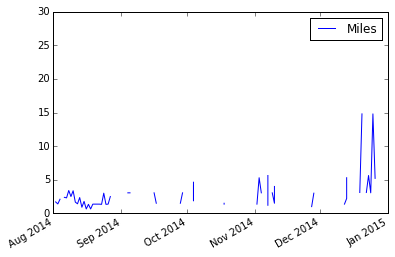

In [31]:
df.plot()

Luckily those are easy to fix, we can use the `fillna` method to fill them in. We're going to assume that I ran 0 miles on those days so let's just fill it in place and plot it again.


Alright, now remember we’re just going to use the fillna method to fill it in. Since we’re going to assume I ran 0 miles on those days. We just fill it with 0 and do it inplace. Now our plot looks much better.

In [32]:
df.Miles.fillna(0,inplace=True)

In [33]:
df.head()

,Miles,Time
2014-08-01,0.0,NaN
2014-08-02,1.7,NaN
2014-08-03,1.4,NaN
2014-08-04,2.1,NaN
2014-08-05,0.0,NaN


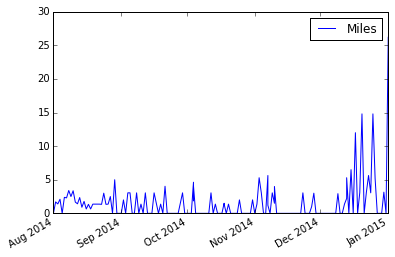

In [34]:
df.plot()

Ah, much better. We can see now that we've got a continuous line from the first date to the last.

Let’s go ahead and save our work thus far. We've modified this dataset a bit so it's worth saving our progress thus far for later analysis. Of course saving our notebook is extremely important so that we can know how we changed the data too.

Saving data is about as easy as reading it in, we just specify the location and save a CSV. If you try and tab complete from `to` you can see that there are numerous different file formats that we can save to. We won't cover these in detail but again they're there for you if you need them.

In [35]:
df.to_csv('../data/date_fixed_running_data.csv')

At this point we’ve covered a lot. We’ve cleaned up a dataset, learned how to parse dates and perform basic joins along indexes. We’ve learned some basic plotting and basic data descriptions. We also know how to read in csvs and save them for later.

## Reading CSVs Part 2

Alright now we’re going to be working with the same running data set. so let’s go ahead and import it. We’ll see again that it’s not converting the dates so we’ve got to do that manually. 

In [36]:
df = pd.read_csv('../data/date_fixed_running_data.csv')
df.head()

,Unnamed: 0,Miles,Time
0,2014-08-01,0.0,NaN
1,2014-08-02,1.7,NaN
2,2014-08-03,1.4,NaN
3,2014-08-04,2.1,NaN
4,2014-08-05,0.0,NaN


However the data, when we import it, doesn't quite look the same.


This is because when you save a data frame to a csv it doesn’t label the index column.

In [37]:
df['Unnamed: 0'].head()

0    2014-08-01
1    2014-08-02
2    2014-08-03
3    2014-08-04
4    2014-08-05
Name: Unnamed: 0, dtype: object

So now our date column is actually the ‘zero’ indexed column. When you use parse_dates you can use either the column name (if available) or the 0-based column index number. 

In [38]:
# df = pd.read_csv('../data/date_fixed_running_data.csv', parse_dates=['Date'])
# above command fails...
df = pd.read_csv('../data/date_fixed_running_data.csv', parse_dates=[0])

In [39]:
df.head()

,Unnamed: 0,Miles,Time
0,2014-08-01,0.0,NaN
1,2014-08-02,1.7,NaN
2,2014-08-03,1.4,NaN
3,2014-08-04,2.1,NaN
4,2014-08-05,0.0,NaN


In [40]:
df.dtypes

Unnamed: 0    datetime64[ns]
Miles                float64
Time                  object
dtype: object

## Renaming Columns 

Great so we've got the right data type but we still have an ugly label - so let's rename our columns. Now there are two ways to do this. One simple and one a bit more fancy. The simple way is just to create index that we want and set it to that. Nothing wrong with that.

In [41]:
cols = ['Date', 'Miles', 'Time']
df.columns = cols
df.head()

,Date,Miles,Time
0,2014-08-01,0.0,NaN
1,2014-08-02,1.7,NaN
2,2014-08-03,1.4,NaN
3,2014-08-04,2.1,NaN
4,2014-08-05,0.0,NaN


We can also do it with a dictionary style look up.

In [42]:
df.rename(columns={df.columns[0]:'Date NEW!'}, inplace=True)

In [43]:
df.head()

,Date NEW!,Miles,Time
0,2014-08-01,0.0,NaN
1,2014-08-02,1.7,NaN
2,2014-08-03,1.4,NaN
3,2014-08-04,2.1,NaN
4,2014-08-05,0.0,NaN


Which is awesome because if you've got a lot of columns and you just want to rename one - you can avoid doing a lot of extra work.

In [44]:
df.rename(columns={df.columns[0]:'Date'}, inplace=True)

In [45]:
df.head()

,Date,Miles,Time
0,2014-08-01,0.0,NaN
1,2014-08-02,1.7,NaN
2,2014-08-03,1.4,NaN
3,2014-08-04,2.1,NaN
4,2014-08-05,0.0,NaN


Now we can plot it again once we set the index.


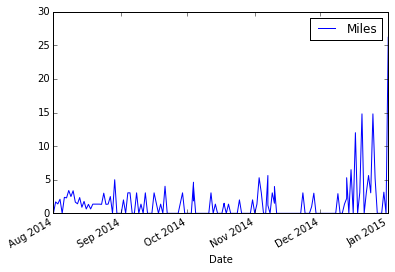

In [46]:
df.set_index('Date', inplace=True)
df.plot()

## Mapping Values + Manipulating Objects

Now one thing we’re going to want to do is get a breakdown of times for each run. Basically, how long on average are the runs? What is the average rate at which I run?

To get that, we're going to use a map function! And we'll do this step by step! First we're going to convert to seconds, from there we can build up to minutes, hours, etc.

Now right now our times are represented as `hours:minutes:seconds`. We need to get that to seconds and remember, we've got handle NaN's because unlike miles - just because we don't have a recorded time doesn't mean any runs that day took no time. So we want to keep NaN values.

In [47]:
raw_time_fmt = df.Time[0]

def get_total_seconds(raw_time):
    if raw_time is np.nan:
        return np.nan # if it's NaN, leave it
    hrs, mins, seconds = str(raw_time).split(':')
    seconds = int(seconds) + 60 * int(mins) + 60 * 60 * int(hrs)
    return seconds    
print(get_total_seconds(raw_time_fmt))

nan


In [48]:
df['Seconds'] = df.Time.map(get_total_seconds)

Awesome, let's make sure that it worked.

In [49]:
df.head(10)

,Miles,Time,Seconds
Date,,,
2014-08-01,0.00,NaN,NaN
2014-08-02,1.70,NaN,NaN
2014-08-03,1.40,NaN,NaN
2014-08-04,2.10,NaN,NaN
2014-08-05,0.00,NaN,NaN
2014-08-06,2.38,NaN,NaN
2014-08-07,2.30,NaN,NaN
2014-08-08,3.40,NaN,NaN
2014-08-09,2.50,NaN,NaN


Now we can get some summary statistics for these runs.

In [50]:
df.describe()

,Miles,Seconds
count,167.000000,52.000000
mean,1.521796,1901.788462
std,2.973174,2560.424171
min,0.000000,376.000000
25%,0.000000,583.750000
50%,0.000000,1343.500000
75%,2.005000,1743.250000
max,26.200000,15643.000000


This is a great example of what  np.NaN is so great in pandas. When we do this describe we get answers unlike in numpy and it just disregards the empty values. If we were to fill in seconds with 0 for days that we didn't run that would completely skew our statistics.

Let's take a look at how much it would change if we did that.

In [51]:
df.fillna(0).describe()

,Miles,Seconds
count,167.000000,167.000000
mean,1.521796,592.173653
std,2.973174,1671.620140
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,2.005000,559.500000
max,26.200000,15643.000000


Hugely significant. Always be careful when you're filling in empty values or removing them!

Now that we have seconds it would be useful to see minutes too. I find it hard to think in seconds. So let's add a new column.

We're going to do that with another map function, and we're just going to take each second count and divide it by 60.

In [52]:
df['Minutes'] = df['Seconds'].map(lambda x: x / 60)

In [53]:
df.describe()

,Miles,Seconds,Minutes
count,167.000000,52.000000,52.000000
mean,1.521796,1901.788462,31.696474
std,2.973174,2560.424171,42.673736
min,0.000000,376.000000,6.266667
25%,0.000000,583.750000,9.729167
50%,0.000000,1343.500000,22.391667
75%,2.005000,1743.250000,29.054167
max,26.200000,15643.000000,260.716667


Awesome, so teh average run is around 30 minutes but there's a large deviation from the mean - so a lot are shorter and some are much longer. We can see that when we see the percentiles. Let's plot the data to see if we can't learn a bit more.

## Plotting



We're going to plot Miles and Minutes together in a scatter plot.

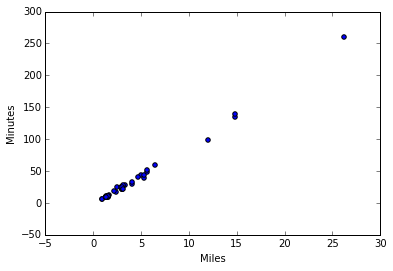

In [54]:
df.plot(x='Miles', y='Minutes', kind='scatter')

Wow that’s linear! (no this data isn't fake, it's actually like that!)

One common test is to see how correlated the variables are.

Let’s see how correlated they are. We do this with the cor method.

In [55]:
df.corr()

,Miles,Seconds,Minutes
Miles,1.000000,0.997203,0.997203
Seconds,0.997203,1.000000,1.000000
Minutes,0.997203,1.000000,1.000000


We can see that miles to time are very tightly correlated (using pearson standard correlation coefficients) there are two other correlation methods that you can use, kendall Tau, and Spearman rank correlation. These don't necessarily apply in this context but it's good to know that they are there. All you have to do is pass in the method name.


In [60]:
df.corr(method="pearson")

,Miles,Seconds,Minutes
Miles,1.000000,0.997203,0.997203
Seconds,0.997203,1.000000,1.000000
Minutes,0.997203,1.000000,1.000000


Now let’s see a box plot. Box plots are very common tools used by data scientists to get a sense for the data they're looking at. This is also called a box and whisker plot. It shows several outliers as well as the mean, and percentiles.

Think of this like a graphical version of the `describe` method. We can see that most of my runs are below an hour except for a couple that are much longer.


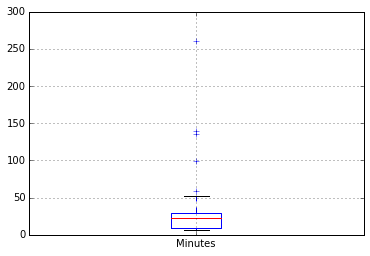

In [61]:
df.boxplot('Minutes', return_type='axes')


Now let's add a new column which is minutes per mile. What's cool is because all of our Series are the same length, we can just divide their values by each to get that number.


In [62]:
df.Minutes/df.Miles

Date
2014-08-01          NaN
2014-08-02          NaN
2014-08-03          NaN
2014-08-04          NaN
2014-08-05          NaN
2014-08-06          NaN
2014-08-07          NaN
2014-08-08          NaN
2014-08-09          NaN
2014-08-10     8.516865
2014-08-11     7.854291
2014-08-12     7.453052
2014-08-13     7.411348
2014-08-14     6.962963
2014-08-14     6.962963
2014-08-15          NaN
2014-08-16          NaN
2014-08-17          NaN
2014-08-18          NaN
2014-08-19          NaN
2014-08-19          NaN
2014-08-20     6.970803
2014-08-21     6.861314
2014-08-22     6.630170
2014-08-23          NaN
2014-08-24          NaN
2014-08-25     6.508516
2014-08-25          NaN
2014-08-26     7.664234
2014-08-27    10.000000
                ...    
2014-12-04          NaN
2014-12-05          NaN
2014-12-06          NaN
2014-12-07          NaN
2014-12-08          NaN
2014-12-09     8.532423
2014-12-10          NaN
2014-12-11          NaN
2014-12-12     6.751825
2014-12-13     8.226415
2014-12-13 

Of course a lot of those values are going to be `NaN` because of division but that's no problem - we only want it for the times that we have recorded anyways.

In [63]:
df['Min_per_mile'] = df['Minutes'] / df['Miles']

In [64]:
df.describe()

,Miles,Seconds,Minutes,Min_per_mile
count,167.000000,52.000000,52.000000,52.000000
mean,1.521796,1901.788462,31.696474,7.725297
std,2.973174,2560.424171,42.673736,0.954475
min,0.000000,376.000000,6.266667,6.000000
25%,0.000000,583.750000,9.729167,7.020479
50%,0.000000,1343.500000,22.391667,7.533333
75%,2.005000,1743.250000,29.054167,8.480023
max,26.200000,15643.000000,260.716667,10.000000


Now that we've `described` that data, let's take a look at the graph. How does the speed change with respect to the number of miles run?

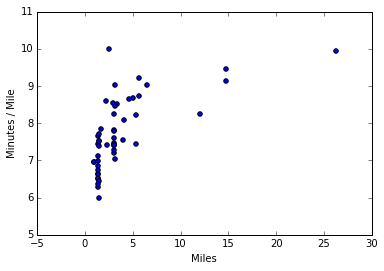

In [65]:
df.plot(x='Miles', y='Min_per_mile', kind='scatter')
plt.ylabel("Minutes / Mile")

Awesome, we can see that there's a high degree of variability in the shorter distances but that does seem to be an arc in the data.


Let’s see a histogram of the speeds. 
Histograms are a great way of representing frequency data or how much certain things are occuring.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x108bca3c8>]], dtype=object)

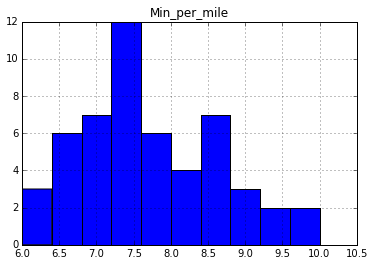

In [66]:
df.hist('Min_per_mile')


seems pretty centered around teh 7 minute to 7.5 minute range. Now histograms are `binning` information so let's see if we can't get a bit more detail when we specify the size of those bins.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x108e65cc0>]], dtype=object)

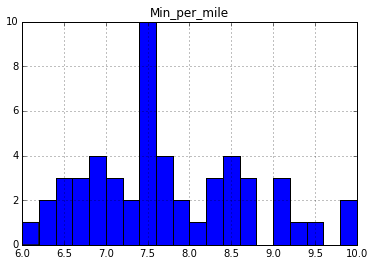

In [67]:
df.hist('Min_per_mile',bins=20)

Wow, that gives a lot more information. We can see how consistent my speed is - there really isn't that much variability. This could just be a result of the distances that were ran or the courses I choose to run.

This graph is worth saving for later analysis - let's go ahead and save it. We can change the limits on each of the axes as well as the title - whether we want a grid, etc. Matplotlib is really flexible.

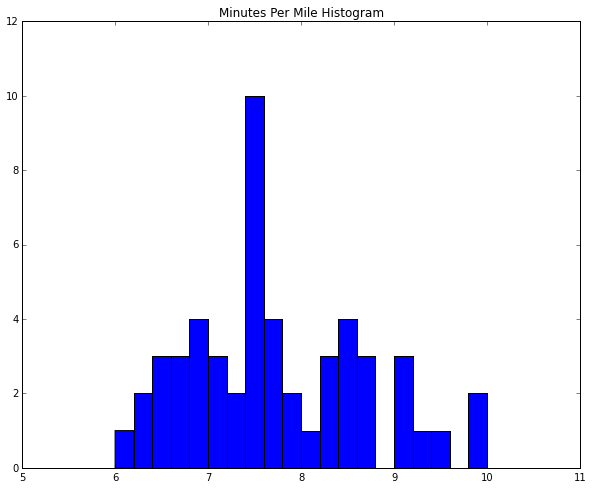

In [68]:
df.hist('Min_per_mile',bins=20, figsize=(10,8))
plt.xlim((5, 11))
plt.ylim((0, 12))
plt.title("Minutes Per Mile Histogram")
plt.grid(False)
plt.savefig('minutes_per_mile_histogram.png')

## Time Series Cont'd: Rolling Calculations

One other thing that's nice to do with time series is see rolling changes over time. For example on a week by week basis, what is the rolling average of the number of miles that I'm running? There’s a lot of different “rolling” type things you can do.

In [69]:
df.Miles.head()

Date
2014-08-01    0.0
2014-08-02    1.7
2014-08-03    1.4
2014-08-04    2.1
2014-08-05    0.0
Name: Miles, dtype: float64

So here’s a standard plot of our Miles again, just a line over time. 

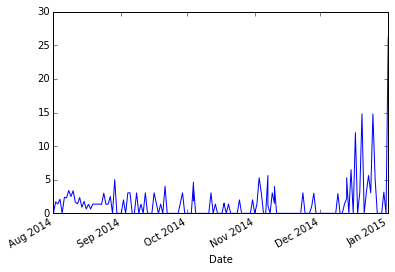

In [70]:
df['Miles'].plot()

Let's say that we want to add another line to this graph - we can do that by just calling another plot command in that same cell.

Let’s take a look at the miles vs the rolling average of the miles per week. I can do that with the `pd.rolling_mean` and all I have t odo is pass in the given DataFrame Column (or Series depending on how you think about it) and the time chunk.


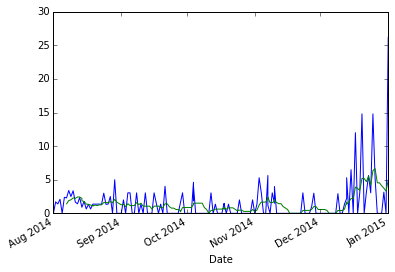

In [71]:
df['Miles'].plot()
pd.rolling_mean(df['Miles'], 7).plot()

I can do the same with the rolling standard deviation or sum.

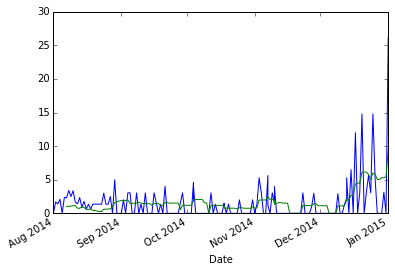

In [72]:
df['Miles'].plot()
pd.rolling_std(df['Miles'], 7).plot()

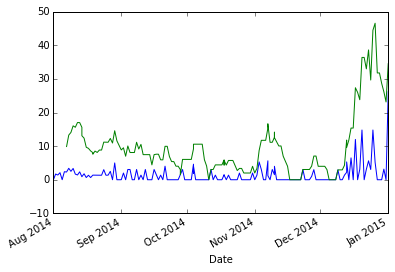

In [73]:
df['Miles'].plot()
pd.rolling_sum(df['Miles'], 7).plot()

We can see how crazy that rolling sum gets at the end. That's because I was preparing to run a marathon on January 1st so I had to start putting in Miles!

## Querying DateTime Indexes

Now on the last note one thing that’s cool about date time indexes is that you can query them very naturally. If I want to get all my runs in october of 2014, I just enter that as a string.

In [74]:
df.index

DatetimeIndex(['2014-08-01', '2014-08-02', '2014-08-03', '2014-08-04',
               '2014-08-05', '2014-08-06', '2014-08-07', '2014-08-08',
               '2014-08-09', '2014-08-10', 
               ...
               '2014-12-23', '2014-12-24', '2014-12-25', '2014-12-26',
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01'],
              dtype='datetime64[ns]', name='Date', length=167, freq=None, tz=None)

In [75]:
df['2014-10']

,Miles,Time,Seconds,Minutes,Min_per_mile
Date,,,,,
2014-10-01,0.00,NaN,NaN,NaN,NaN
2014-10-02,0.00,NaN,NaN,NaN,NaN
2014-10-03,0.00,NaN,NaN,NaN,NaN
2014-10-04,4.63,0:40:00,2400,40.000000,8.639309
2014-10-04,1.87,NaN,NaN,NaN,NaN
2014-10-04,4.08,0:33:00,1980,33.000000,8.088235
2014-10-05,0.00,NaN,NaN,NaN,NaN
2014-10-06,0.00,NaN,NaN,NaN,NaN
2014-10-07,0.00,NaN,NaN,NaN,NaN



If I want to get from November to December, I can do that as a Series.


In [76]:
df['2014-11':'2014-12']

,Miles,Time,Seconds,Minutes,Min_per_mile
Date,,,,,
2014-11-01,0.00,NaN,NaN,NaN,NaN
2014-11-02,1.37,0:08:43,523,8.716667,6.362530
2014-11-03,5.30,0:39:26,2366,39.433333,7.440252
2014-11-04,3.05,0:22:12,1332,22.200000,7.278689
2014-11-05,0.00,NaN,NaN,NaN,NaN
2014-11-06,0.00,NaN,NaN,NaN,NaN
2014-11-07,5.63,0:49:05,2945,49.083333,8.718176
2014-11-07,1.26,NaN,NaN,NaN,NaN
2014-11-07,1.20,NaN,NaN,NaN,NaN



How do you think we might go from November to January 1 2015?

Go ahead and give it a try and see if you can figure it out.


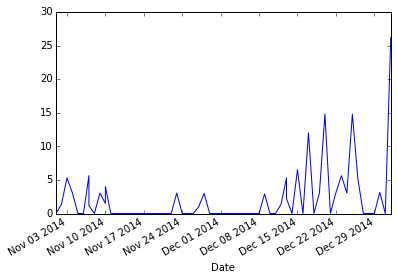

In [77]:
df['2014-11':'2015-1-1']['Miles'].plot()


Now we can specify a series this way but we can’t specific a specific date. To get a specific date’s run. 


In [78]:
# will error
# df['2014-8-12']

To do that we need to use `loc` which we haven't covered yet but is just the value at that index location.

In [79]:
df.loc['2014-8-12']

Miles               1.42
Time             0:10:35
Seconds              635
Minutes         10.58333
Min_per_mile    7.453052
Name: 2014-08-12 00:00:00, dtype: object


now that we’ve done all this work. We should save it so that we don’t have to remember what our operations were or what stage we did them at. Now we could save it to csv like we did our other one but I wanted to illustrate all the different ways you can save this file.

Let’s save our csv, but we can also save it as an html page(which will give us a table view) or a json file.


In [80]:
df.to_csv('../data/date_fixed_running_data_with_time.csv')
df.to_html('../data/date_fixed_running_data_with_time.html')

One thing to note with JSON files is that they want unique indexes (because they're going to be come the keys), so we've got to give it a new index. We can do this by resetting our index or setting our index to a column.

In [81]:
# will error
# df.to_json("../data/date_fixed_running_data_with_time.json")

In [82]:
df.reset_index().to_json("../data/date_fixed_running_data_with_time.json")

Now there’s a LOT more you can do with date time indexing but by now you should be getting familiar with the pandas matplotlib workflow. It's really powerful and what data scientists around the world are working with right now.

In this next part we're going to explore some of the more sophisticated analysis techniques that we can use including filtering, dropping rows, groupings. Let's get started by reading in our data again.

In [83]:
df = pd.read_csv('../data/date_fixed_running_data_with_time.csv', parse_dates=['Date'], usecols=list(range(0,6)))

In [84]:
df.dtypes

Date            datetime64[ns]
Miles                  float64
Time                    object
Seconds                float64
Minutes                float64
Min_per_mile           float64
dtype: object

In [85]:
df.sort(inplace=True)
df.head()

,Date,Miles,Time,Seconds,Minutes,Min_per_mile
0,2014-08-01,0.0,NaN,NaN,NaN,NaN
1,2014-08-02,1.7,NaN,NaN,NaN,NaN
2,2014-08-03,1.4,NaN,NaN,NaN,NaN
3,2014-08-04,2.1,NaN,NaN,NaN,NaN
4,2014-08-05,0.0,NaN,NaN,NaN,NaN


First we'll review getting summary statistics. As we've seen we can get them for the entire data set and now I'll show you how to get them for individual columns. We're also going to focus on answering real questions of this data - what's really going on behind the scenes?

So let's answer some direct questions. What are the longest and shorest runs by time and distance?

In [86]:
df.Minutes.max()

260.71666666666664

In [87]:
df.Miles.max()

26.199999999999999

In [88]:
df.Miles.min()

0.0

In [89]:
df.Minutes.min()

6.2666666666666675

Now we should go about ignoring the blank values (remember how we filled them in with zero for the miles?).

In [90]:
df.Miles[df.Miles > 0].min()

0.65000000000000002

What about getting the most common running distances excluding the times when there was no running?

In [91]:
df.Miles[df.Miles > 0].value_counts().index[0]

1.3700000000000001

That's a specific route that I run, so I know that I've done it a fair amount. Let's plot a graph of the cumulative running distance in the dataset.

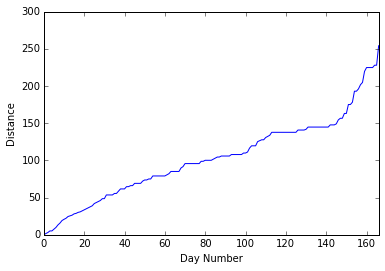

In [92]:
df.Miles.cumsum().plot()
plt.xlabel("Day Number")
plt.ylabel("Distance")

What about the cumulative total running distance in the dataset?

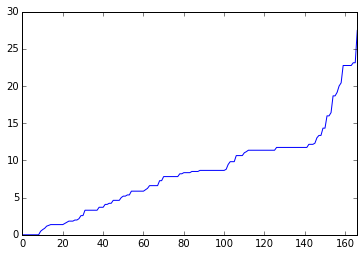

In [93]:
(df.Minutes.fillna(0).cumsum() / 60).plot()

Another interesting question we could ask is what days of the week do I commonly go for runs. Am I faster on certain days or does my speed improve over time relative to the distance that I'm running.

We can get days of weeks by formatting the strings - it's a pretty straightforward process and we're just going to create a map to do it.

In [94]:
df.Date[0].strftime("%A")

'Friday'

In [95]:
df.Date.map(lambda x: x.strftime("%A")).head()

0      Friday
1    Saturday
2      Sunday
3      Monday
4     Tuesday
Name: Date, dtype: object

We know that's working so let's just set it to a new column.

In [96]:
df['Day_of_week'] = df.Date.map(lambda x: x.strftime("%A"))

In [97]:
df.head()

,Date,Miles,Time,Seconds,Minutes,Min_per_mile,Day_of_week
0,2014-08-01,0.0,NaN,NaN,NaN,NaN,Friday
1,2014-08-02,1.7,NaN,NaN,NaN,NaN,Saturday
2,2014-08-03,1.4,NaN,NaN,NaN,NaN,Sunday
3,2014-08-04,2.1,NaN,NaN,NaN,NaN,Monday
4,2014-08-05,0.0,NaN,NaN,NaN,NaN,Tuesday


and we can make a bar plot of it, but let's see if we can distinguish anything unique about certain days of the week. We're going to filter out the days with no runs to see if that tells us anything.

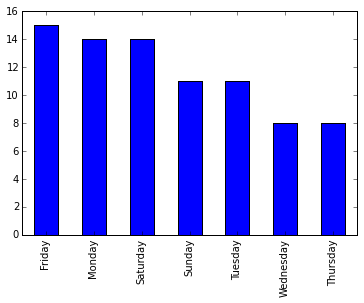

In [98]:
df[df.Miles > 0].Day_of_week.value_counts().plot(kind='bar')

We can see that in this sample I run a lot more on the Friday, Saturday, and Monday. Some interesting patterns might emerge if we dig deeper but all that this gives us is the cumulative count for each day of the week. In order for us to get at the actual summary stats for these days - we're going to have to create a group. Now we could just manually filter each group down to what we want but that's a really inefficient way to do it. So let's approach it computationally.

What we're going to do is create a grouping by that key.
First let's remove the Time column - seeing as we already have minutes and  seconds.

## Removing Columns

Removing columns is obviously something that you should understand so let's look at some different techniques for doing it. First we can use the `del` keyword.

In [99]:
del(df['Time'])

This will delete it inplace, as we can see if we take a look at our columns now.

In [100]:
df.columns

Index(['Date', 'Miles', 'Seconds', 'Minutes', 'Min_per_mile', 'Day_of_week'], dtype='object')

We can also use the drop method to drop a column. Let's see how that would work with the seconds column. You'll notice that we have to specify an axis (because we can drop a row as well).

In [101]:
df.drop('Seconds',axis=1).head()

,Date,Miles,Minutes,Min_per_mile,Day_of_week
0,2014-08-01,0.0,NaN,NaN,Friday
1,2014-08-02,1.7,NaN,NaN,Saturday
2,2014-08-03,1.4,NaN,NaN,Sunday
3,2014-08-04,2.1,NaN,NaN,Monday
4,2014-08-05,0.0,NaN,NaN,Tuesday


we can also use drop to drop a specific row by specifying the 0 axis.

In [102]:
tempdf = pd.DataFrame(np.arange(4).reshape(2,2))
tempdf

,0,1
0,0,1
1,2,3


In [103]:
tempdf.drop(1,axis=0)

,0,1
0,0,1


Now that we've taken that brief stop off at dropping rows let's get back to dropping columns. Another method is to pop out a row which will return that row as a Series and happen `in place`.

In [104]:
df.pop('Seconds').head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Seconds, dtype: float64

In [105]:
df.head()

,Date,Miles,Minutes,Min_per_mile,Day_of_week
0,2014-08-01,0.0,NaN,NaN,Friday
1,2014-08-02,1.7,NaN,NaN,Saturday
2,2014-08-03,1.4,NaN,NaN,Sunday
3,2014-08-04,2.1,NaN,NaN,Monday
4,2014-08-05,0.0,NaN,NaN,Tuesday


## Groups

Now we've made our dataset a bit more manageable. We've kind of just got the basics of what we need to perform some groupwise analysis.

Now at this point we're going to do some groupings. This is an extremely powerful part of pandas and one that you'll use all the time.

pandas follows the the Split-Apply-Combine style of data analysis.

Many data analysis problems involve the application of a split-apply-combine strategy, where you break up a big problem into manageable pieces, operate on each piece independently and then put all the pieces back together. It was really created by Hadley Wickham who is a developer that works on the R programming language. He's written a ton of super popular libraries. Here's a paper on the split-apply-combine strategy : http://www.jstatsoft.org/v40/i01/paper


Back to our problem statement, since we're going to want to check things in groups. What I'm going to do is try to analyze each day of the week to see if there are any differences in the types of running that I do on those days.

we'll start by grouping or data set on those weekdays. Basically creating a dictionary of the data where the key is the weekday and the value is the dataframe of all those values.

First let's explore the hard way of doing this, then we'll do it in the correct way.

In [106]:
for dow in df.Day_of_week.unique():
    print(dow)
    print(df[df.Day_of_week == dow])
    break

Friday
          Date  Miles    Minutes  Min_per_mile Day_of_week
0   2014-08-01   0.00        NaN           NaN      Friday
7   2014-08-08   3.40        NaN           NaN      Friday
15  2014-08-15   1.78        NaN           NaN      Friday
23  2014-08-22   1.37   9.083333      6.630170      Friday
31  2014-08-29   5.00  43.450000      8.690000      Friday
38  2014-09-05   3.05  23.833333      7.814208      Friday
45  2014-09-12   3.05  23.766667      7.792350      Friday
52  2014-09-19   1.37   9.750000      7.116788      Friday
59  2014-09-26   0.00        NaN           NaN      Friday
67  2014-10-03   0.00        NaN           NaN      Friday
76  2014-10-10   0.00        NaN           NaN      Friday
83  2014-10-17   0.00        NaN           NaN      Friday
92  2014-10-24   0.00        NaN           NaN      Friday
99  2014-10-31   2.01        NaN           NaN      Friday
106 2014-11-07   5.63  49.083333      8.718176      Friday
107 2014-11-07   1.26        NaN           NaN   

This is clearly an ugly way to do this. It's inefficient and error prone because there's state involved.

Let's do it in the pandas way, which is much more simple and intuitive. The pandas way is to create a grouping object which has some special properties. However before doing that we're going to filter out some of the zero values because they'll throw off our analysis.

In [107]:
df['Miles'] = df.Miles[df.Miles > 0]

Now for the group by method.

In [108]:
dows = df.groupby('Day_of_week')
print(dows)

This will basically create day-name chunks of the data and treat those as individual DataFrames. We really just took one DataFrame and made it into 7. Let's get some information from those now.

We can get the size of each one by using the size command. This basically tells us how many items are in each category. The count will give us the count of each column, by group, in the data.

In [109]:
dows.size()

Day_of_week
Friday       24
Monday       25
Saturday     27
Sunday       23
Thursday     23
Tuesday      23
Wednesday    22
dtype: int64

In [110]:
dows.count()

,Date,Miles,Minutes,Min_per_mile
Day_of_week,,,,
Friday,24,15,8,8
Monday,25,14,10,10
Saturday,27,14,6,6
Sunday,23,11,8,8
Thursday,23,8,5,5
Tuesday,23,11,8,8
Wednesday,22,8,7,7


Now we have our groups and we can start doing groupwise analysis, now what does that mean? 

It means we can start answering questions like what is the average speed per weekday or what is the total miles run per weekday?

In [111]:
dows.mean()

,Miles,Minutes,Min_per_mile
Day_of_week,,,
Friday,2.786000,24.308333,7.747657
Monday,2.607143,22.243333,7.463291
Saturday,3.246429,46.708333,8.184961
Sunday,2.422727,19.762500,7.463840
Thursday,6.315000,84.530000,8.039543
Tuesday,2.428182,21.770833,7.659706
Wednesday,3.315000,28.021429,7.829348


In [112]:
dows.sum()

,Miles,Minutes,Min_per_mile
Day_of_week,,,
Friday,41.79,194.466667,61.981259
Monday,36.50,222.433333,74.632908
Saturday,45.45,280.250000,49.109769
Sunday,26.65,158.100000,59.710723
Thursday,50.52,422.650000,40.197717
Tuesday,26.71,174.166667,61.277645
Wednesday,26.52,196.150000,54.805434


It might be interesting to see the total sum of the amount of runs to try and see any outliers simply because Thursday, Friday, Saturday are close in distances, relatively, but not so much in speed. We can also get access to the summary statistics from here.

In [113]:
dows.describe()

Miles  Min_per_mile     Minutes
Day_of_week                                           
Friday      count  15.000000      8.000000    8.000000
            mean    2.786000      7.747657   24.308333
            std     1.510718      0.844590   15.376198
            min     1.200000      6.630170    9.083333
            25%     1.370000      7.025547    9.625000
            50%     3.000000      7.803279   23.800000
            75%     3.250000      8.523306   30.550000
            max     5.630000      8.718176   49.083333
Monday      count  14.000000     10.000000   10.000000
            mean    2.607143      7.463291   22.243333
            std     1.688538      1.037698   16.318699
            min     0.650000      6.000000    8.600000
            25%     1.402500      6.677835    9.637500
            50%     1.885000      7.520672   17.516667
            75%     3.087500      7.815719   26.795833
            max     6.500000      9.033333   58.716667
Saturday    count  14.000000      6.000000    6.000000
            mean    3.246429      8.184961   46.708333
            std     3.592504      0.926076   45.119311
            min     0.650000      6.444444    9.666667
            25%     1.500000      8.122780   22.487500
            50%     1.935000      8.408079   36.500000
            75%     3.685000      8.626918   42.700000
            max    14.800000      9.121622  135.000000
Sunday      count  11.000000      8.000000    8.000000
            mean    2.422727      7.463840   19.762500
            std     1.000241      0.578829    8.282836
            min     1.340000      6.362530    8.716667
            25%     1.450000      7.408470   11.300000
            50%     3.000000      7.474317   22.591667
            75%     3.050000      7.533788   24.116667
            max     4.030000      8.516865   30.366667
Thursday    count   8.000000      5.000000    5.000000
            mean    6.315000      8.039543   84.530000
            std     9.300811      1.531027  114.032318
            min     0.900000      6.861314    6.266667
            25%     0.975000      6.962963    6.266667
            50%     1.835000      6.962963    9.400000
            75%     5.987500      9.459459  140.000000
            max    26.200000      9.951018  260.716667
Tuesday     count  11.000000      8.000000    8.000000
            mean    2.428182      7.659706   21.770833
            std     1.321990      0.830158   13.777549
            min     1.370000      6.630170    9.083333
            25%     1.370000      7.218276   10.562500
            50%     2.000000      7.464231   22.183333
            75%     3.050000      7.881281   23.350000
            max     5.630000      9.206631   51.833333
Wednesday   count   8.000000      7.000000    7.000000
            mean    3.315000      7.829348   28.021429
            std     3.562291      1.142713   32.039394
            min     1.370000      6.532847    8.950000
            25%     1.467500      7.185401   10.325000
            50%     2.365000      7.411348   17.416667
            75%     2.637500      8.245219   25.066667
            max    12.000000     10.000000   99.000000

Now we don't always have to create this intermediate object, we can also just chain this commands together to do quick exploratory analysis.

In [114]:
df.groupby('Day_of_week').mean()

,Miles,Minutes,Min_per_mile
Day_of_week,,,
Friday,2.786000,24.308333,7.747657
Monday,2.607143,22.243333,7.463291
Saturday,3.246429,46.708333,8.184961
Sunday,2.422727,19.762500,7.463840
Thursday,6.315000,84.530000,8.039543
Tuesday,2.428182,21.770833,7.659706
Wednesday,3.315000,28.021429,7.829348


In [115]:
df.groupby('Day_of_week').std()

,Miles,Minutes,Min_per_mile
Day_of_week,,,
Friday,1.510718,15.376198,0.844590
Monday,1.688538,16.318699,1.037698
Saturday,3.592504,45.119311,0.926076
Sunday,1.000241,8.282836,0.578829
Thursday,9.300811,114.032318,1.531027
Tuesday,1.321990,13.777549,0.830158
Wednesday,3.562291,32.039394,1.142713


We can also iterate through the groups in a straightforward way because the groupby is iterable. The iterable is a tuple of name (string) and group (dataframe). Which we can access individually.

In [116]:
for name, group in dows:
    print(name)
    print(group.head())

Friday
         Date  Miles    Minutes  Min_per_mile Day_of_week
0  2014-08-01    NaN        NaN           NaN      Friday
7  2014-08-08   3.40        NaN           NaN      Friday
15 2014-08-15   1.78        NaN           NaN      Friday
23 2014-08-22   1.37   9.083333       6.63017      Friday
31 2014-08-29   5.00  43.450000       8.69000      Friday
Monday
         Date  Miles    Minutes  Min_per_mile Day_of_week
3  2014-08-04   2.10        NaN           NaN      Monday
10 2014-08-11   1.67  13.116667      7.854291      Monday
18 2014-08-18   0.65        NaN           NaN      Monday
26 2014-08-25   1.37   8.916667      6.508516      Monday
27 2014-08-25   1.34        NaN           NaN      Monday
Saturday
         Date  Miles  Minutes  Min_per_mile Day_of_week
1  2014-08-02   1.70      NaN           NaN    Saturday
8  2014-08-09   2.50      NaN           NaN    Saturday
16 2014-08-16   0.65      NaN           NaN    Saturday
24 2014-08-23   1.34      NaN           NaN    Saturday
3

We can also get specific groups using the get_group method.

In [117]:
dows.get_group('Friday').head()

,Date,Miles,Min_per_mile,Minutes
0,2014-08-01,NaN,NaN,NaN
7,2014-08-08,3.40,NaN,NaN
15,2014-08-15,1.78,NaN,NaN
23,2014-08-22,1.37,6.63017,9.083333
31,2014-08-29,5.00,8.69000,43.450000


There's another command that you should be familiary with which is the `agg` method. This performs an operation on each sub-DataFrame. For example, we can get counts (or total number of rows) with the `len` aggregation.

In [118]:
dows.agg(lambda x: len(x))['Miles']

Day_of_week
Friday       24
Monday       25
Saturday     27
Sunday       23
Thursday     23
Tuesday      23
Wednesday    22
Name: Miles, dtype: float64

I will say that this is probably one of the more powerful functions available in pandas because you can write your own functions - we'll be doing this later on in the course as well. We can achieve this same method by just appending a Count column with the scalar value of one, then getting the sum.

In [119]:
df['Count'] = 1
df.head(10)

,Date,Miles,Minutes,Min_per_mile,Day_of_week,Count
0,2014-08-01,NaN,NaN,NaN,Friday,1
1,2014-08-02,1.70,NaN,NaN,Saturday,1
2,2014-08-03,1.40,NaN,NaN,Sunday,1
3,2014-08-04,2.10,NaN,NaN,Monday,1
4,2014-08-05,NaN,NaN,NaN,Tuesday,1
5,2014-08-06,2.38,NaN,NaN,Wednesday,1
6,2014-08-07,2.30,NaN,NaN,Thursday,1
7,2014-08-08,3.40,NaN,NaN,Friday,1
8,2014-08-09,2.50,NaN,NaN,Saturday,1
9,2014-08-10,3.36,28.616667,8.516865,Sunday,1


In [120]:
df.groupby('Day_of_week').sum()

,Miles,Minutes,Min_per_mile,Count
Day_of_week,,,,
Friday,41.79,194.466667,61.981259,24
Monday,36.50,222.433333,74.632908,25
Saturday,45.45,280.250000,49.109769,27
Sunday,26.65,158.100000,59.710723,23
Thursday,50.52,422.650000,40.197717,23
Tuesday,26.71,174.166667,61.277645,23
Wednesday,26.52,196.150000,54.805434,22


See how that count is the exact same that we got above? That covers a lot of the basic pandas material regarding grouping, filtering and that sort of thing. This is really the basics and likely a lot of what you'll be using on a regular basis going forward. Next we'll tackle some more complicated analysis.